In [1]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import norm
from IPython.display import display, Latex, HTML, Math
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sympy as sp
import math as math
from matplotlib import pyplot as plt
from sympy.abc import t
from IPython.display import display, Math, Latex
import numpy as np
%matplotlib inline
x, y, z, t, u, c = symbols('x y z t u c')
sp.init_printing() 

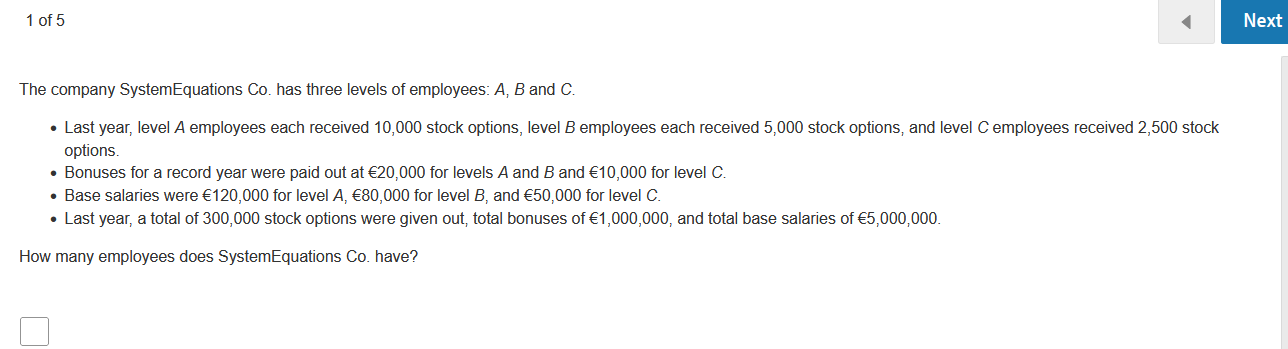

In [2]:
# Coefficient matrix
coeff_matrix = np.array([
    [10000, 5000, 2500],    # Stock options
    [20000, 20000, 10000],  # Bonuses  
    [120000, 80000, 50000]  # Base salaries
])

# Constants vector
constants = np.array([300000, 1000000, 5000000])

# Solve
solution = np.linalg.solve(coeff_matrix, constants)

print(f"Level A employees: {solution[0]:.0f}")
print(f"Level B employees: {solution[1]:.0f}")
print(f"Level C employees: {solution[2]:.0f}")
print(f"Total employees: {sum(solution):.0f}")


Level A employees: 10
Level B employees: 10
Level C employees: 60
Total employees: 80


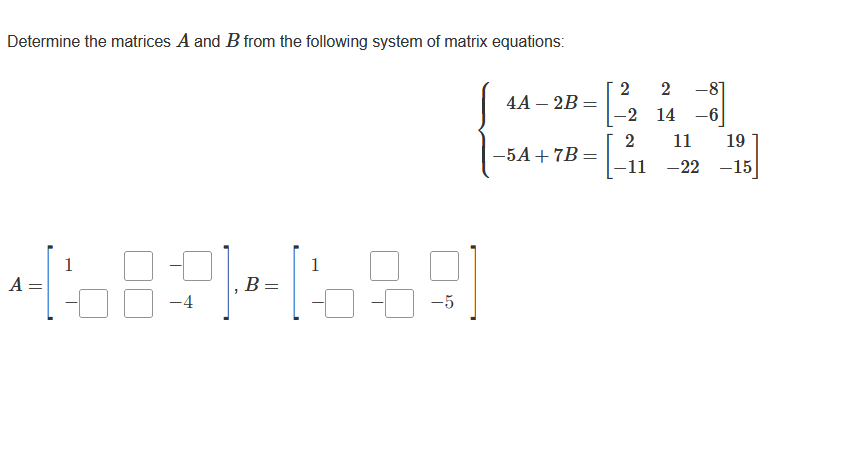

In [3]:

# Matrix equations: 4A - 2B = C1, -5A + 7B = C2
C1 = np.array([[2, 2, -8], [-2, 14, -6]])
C2 = np.array([[2, 11, 19], [-11, -22, -15]])

# 4A - 2B = C1 => 4A = 2B + C1 => A = (2B + C1)/4
# -5A + 7B = C2 => -5((2B + C1)/4) + 7B = C2 => (-10B - 5C1)/4 + 7B = C2 => (-10B -5C1 + 28B)/4 = C2
# -5/4C1 + 18B/4 = C2 => B = 2/9 * (C2 + 5/4C1)
B = (2/9) * (C2 + (5/4) * C1)
A = (2*B + C1)/4
print(B)
print(A)


[[ 1.  3.  2.]
 [-3. -1. -5.]]
[[ 1.  2. -1.]
 [-2.  3. -4.]]


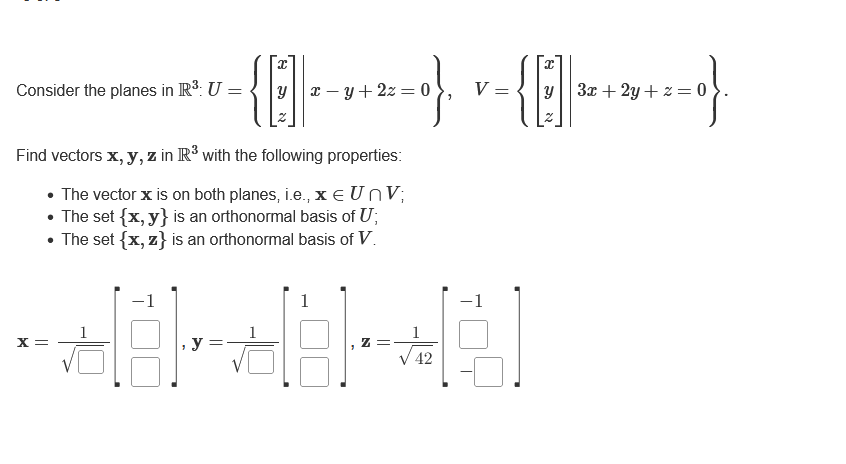

In [4]:
# we find the null space then normalize to find x
# x - y + 2z = 0 => x = y - 2z
# 3x + 2y + z = 0 => 3y - 6z + 2y + z = 0 => 5y = 5z => y = z => x = -z
null_vec = [-1,1,1]
# normalize null_vect = √((-1)² + 1² + 1²) = √(1 + 1 + 1) = √3
# x = 1/nor * null_vect

# Now find y in plane U orthogonal to x
# Choose any vector in plane U: v = [1,1,0] (check: 1-1+2(0) = 0 ✓)
# Check if orthogonal to x: v·x = (1)(-1) + (1)(1) + (0)(1) = -1+1+0 = 0 ✓
# Since v is already orthogonal to x, we can use it directly
v_U = [1,1,0]
# normalize: ||v_U|| = √(1² + 1² + 0²) = √2
# y = 1/√2 * [1,1,0]

# Now find z in plane V orthogonal to x
# Choose vector in plane V: w = [1,0,-3] (check: 3(1)+2(0)+(-3) = 0 ✓)
# Check if orthogonal to x: w·x = (1)(-1) + (0)(1) + (-3)(1) = -1+0-3 = -4 ≠ 0
# since w is not orthogonal to x, use Gram-Schmidt: z = w - proj_x(w)

# Step 1: Calculate projection of w onto x
# proj_x(w) = (w·x / ||x||²) * x
# w·x = (1)(-1) + (0)(1) + (-3)(1) w·x = -1 + 0 + (-3) w·x = -1 - 3 w·x = -4
# ||x||² = 3
# proj_x(w) = (-4/3) * [-1,1,1] = [4/3, -4/3, -4/3]

# Step 2: Subtract projection to get orthogonal component
# z_raw = w - proj_x(w) = [1,0,-3] - [4/3, -4/3, -4/3]
# z_raw = [1-4/3, 0+4/3, -3+4/3] = [-1/3, 4/3, -5/3]

# Step 3: Scale to integers (multiply by -3)
# z = [1, -4, 5]

# Step 4: Normalize
# ||z|| = √(1² + (-4)² + 5²) = √42
# z = 1/√42 * [1,-4,5]

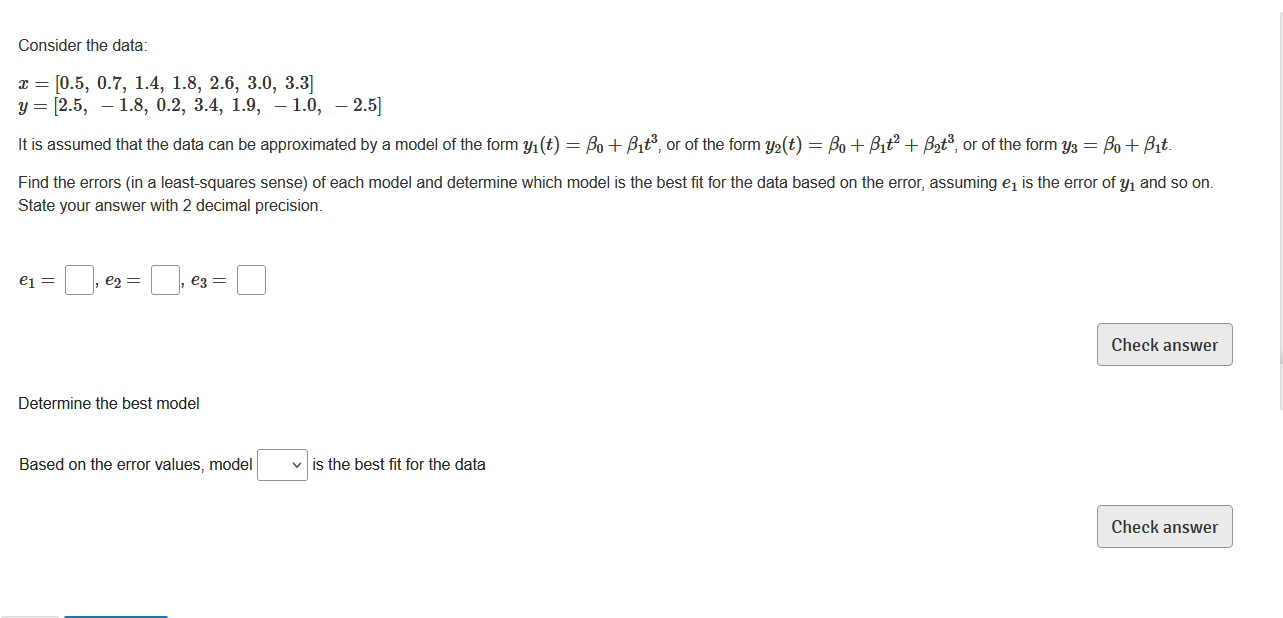

In [5]:
# Data
x = np.array([0.5, 0.7, 1.4, 1.8, 2.6, 3.0, 3.3])
y = np.array([2.5, -1.8, 0.2, 3.4, 1.9, -1.0, -2.5])

# Design matrices for the three models
X1 = Matrix(ones(len(x), 1)).row_join(Matrix(x**3))  # Model 1: β0 + β1*t³
X2 = Matrix(ones(len(x), 1)).row_join(Matrix(x**2)).row_join(Matrix(x**3)) # Model 2: β0 + β1*t² + β2*t³
X3 = Matrix(ones(len(x), 1)).row_join(Matrix(x))  # Model 3: β0 + β1*t

# a)

display(Math(r'X_1 = ' + latex(X1) + r'\quad X_2 = ' + latex(X2) + r'\quad X_3 = ' + latex(X3) + r'\quad y = '
             + latex(Matrix(y))))


# Model 1: y1(t) = β0 + β1*t³
X1tX1 = X1.T*X1
X1ty = X1.T*Matrix(y)
Mat, _ = X1tX1.row_join(X1ty).rref()
B1 = Mat[:,-1]
display(Latex("$$y_1(t) = {} + {}t^3$$".format(round(B1[0],4), round(B1[1], 4))))

# Model 2: y2(t) = β0 + β1*t² + β2*t³
X2tX2 = X2.T*X2
X2ty = X2.T*Matrix(y)
Mat, _ = X2tX2.row_join(X2ty).rref()
B2 = Mat[:,-1]
display(Latex("$$y_2(t) = {} + {}t^2 + {}t^3$$".format(round(B2[0],4), round(B2[1], 4), round(B2[2], 4))))

# Model 3: y3(t) = β0 + β1*t
X3tX3 = X3.T*X3
X3ty = X3.T*Matrix(y)
Mat, _ = X3tX3.row_join(X3ty).rref()
B3 = Mat[:,-1]
display(Latex("$$y_3(t) = {} + {}t$$".format(round(B3[0],4), round(B3[1], 4))))

# Calculate errors (least squares sense)
e1 = (Matrix(y) - X1*B1).norm()
e2 = (Matrix(y) - X2*B2).norm()
e3 = (Matrix(y) - X3*B3).norm()

display(Latex("$$e_1 = {}$$".format(round(e1, 4))))
display(Latex("$$e_2 = {}$$".format(round(e2, 4))))
display(Latex("$$e_3 = {}$$".format(round(e3, 4))))

# Determine best model
errors = [float(e1), float(e2), float(e3)]
best_model = errors.index(min(errors)) + 1
display(Latex("$$Best \\ model: \\ Model \\ {}$$".format(best_model)))

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

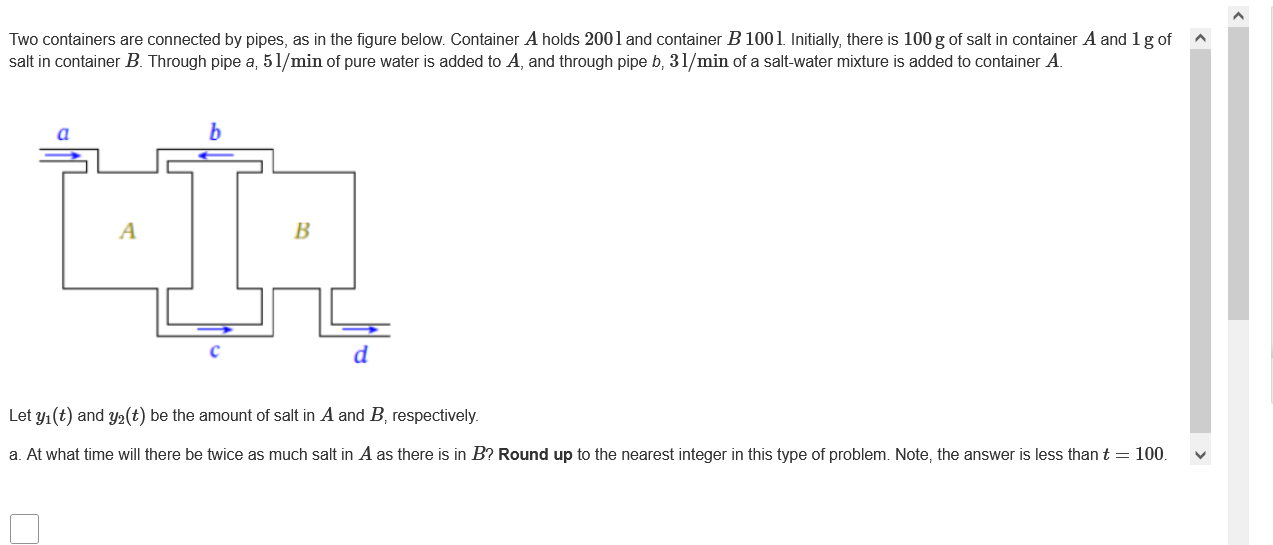

In [6]:
t = symbols('t', positive=True)
y1, y2 = symbols('y1 y2', cls=Function)

eq1 = Eq(y1(t).diff(t), -(8/200)*y1(t) + (3/100)*y2(t))
eq2 = Eq(y2(t).diff(t), (8/200)*y1(t) - (8/100)*y2(t))

# Solve
solutions = dsolve([eq1, eq2], [y1(t), y2(t)], ics={y1(0): 100, y2(0): 1})
y1_sol = solutions[0].rhs
y2_sol = solutions[1].rhs

# Find when y1(t) = 2*y2(t)
time_solutions = solve(Eq(y1_sol, 2*y2_sol), t)
target_time = min([float(sol) for sol in time_solutions if sol.is_real and sol > 0])

print(f"Time when tank A has twice as much salt as tank B: {target_time:.0f} minutes")



Time when tank A has twice as much salt as tank B: 20 minutes


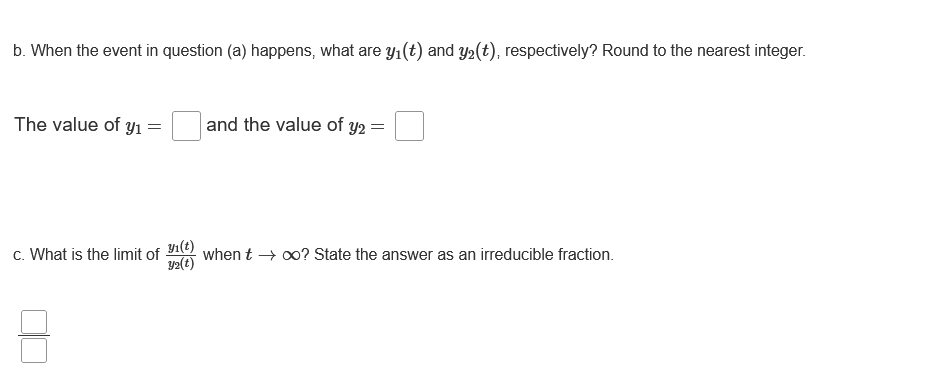

In [7]:
# Part b: Values at that time
y1_at_event = float(y1_sol.subs(t, target_time))
y2_at_event = float(y2_sol.subs(t, target_time))
print(f"Part b: y1 = {round(y1_at_event)} and y2 = {round(y2_at_event)}")

Part b: y1 = 54 and y2 = 27


In [8]:
# c. Limit as t → ∞
ratio_limit = limit(y1_sol/y2_sol, t, oo)


print(f"c. Limit = {ratio_limit}")

c. Limit = 3/2


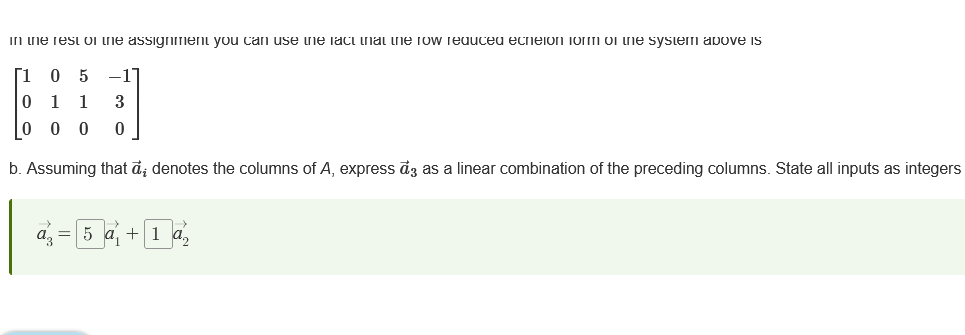

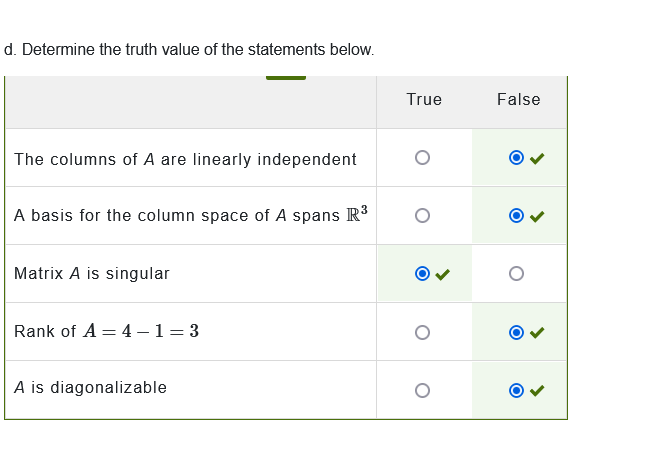

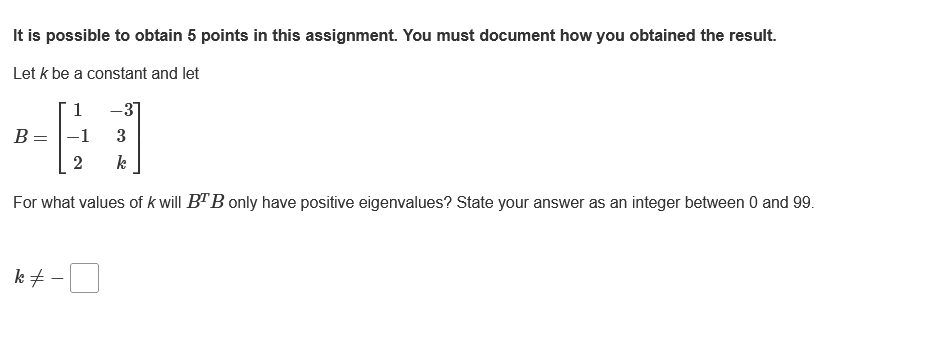

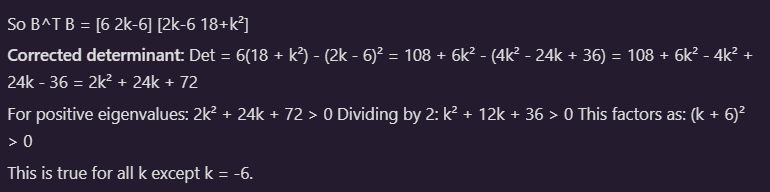

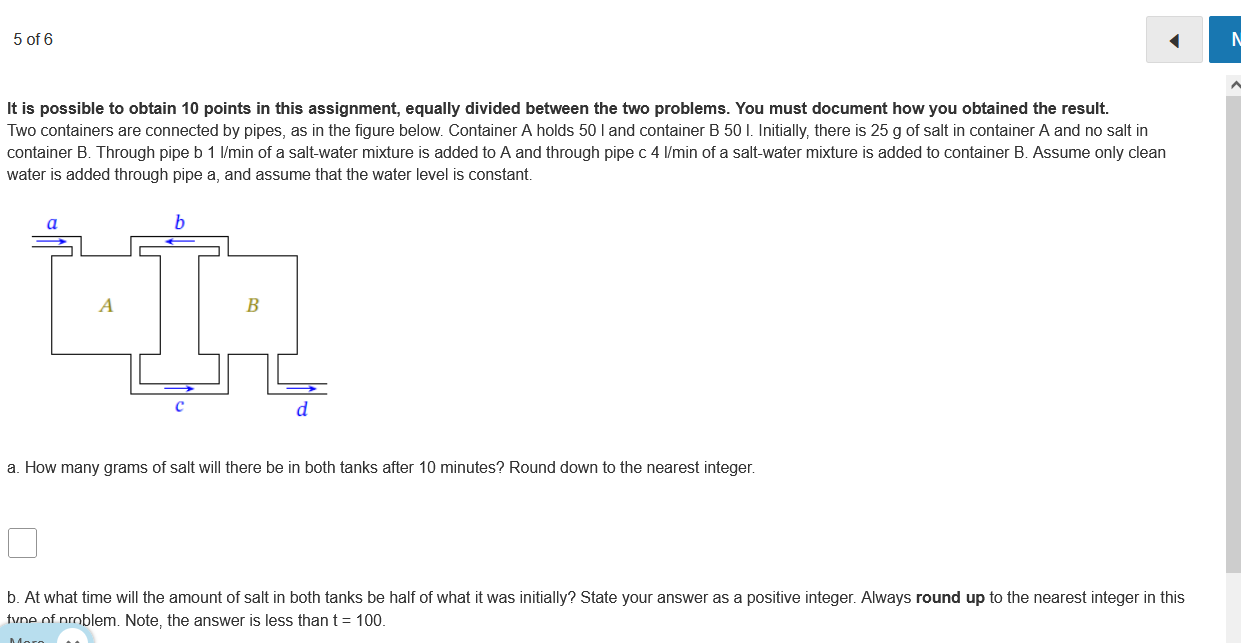

In [9]:
t = symbols('t', positive=True)
y1, y2 = symbols('y1 y2', cls=Function)

eq1 = Eq(y1(t).diff(t), -(4/50)*y1(t) + (1/50)*y2(t))
eq2 = Eq(y2(t).diff(t), (4/50)*y1(t) - (4/50)*y2(t))

# Solve
solutions = dsolve([eq1, eq2], [y1(t), y2(t)], ics={y1(0): 25, y2(0): 0})
y1_sol = solutions[0].rhs
y2_sol = solutions[1].rhs

# Calculate salt after 10 minutes
t_10 = 10
salt_A_10 = y1_sol.subs(t, t_10)
salt_B_10 = y2_sol.subs(t, t_10)
total_salt_10 = salt_A_10 + salt_B_10

print(f"Salt in tank A after 10 minutes: {float(salt_A_10):.1f} g")
print(f"Salt in tank B after 10 minutes: {float(salt_B_10):.1f} g") 
print(f"Total salt after 10 minutes: {float(total_salt_10):.0f} g")


Salt in tank A after 10 minutes: 12.1 g
Salt in tank B after 10 minutes: 9.2 g
Total salt after 10 minutes: 21 g


In [ ]:
# Corrected equations with salt leaving through pipe d
# Tank A: salt flows from B to A, and from A to B
eq1 = Eq(y1(t).diff(t), (1/50)*y2(t) - (4/50)*y1(t))

# Tank B: salt flows from A to B, and leaves through pipe d
# 4 L/min leaves B with concentration y2(t)/50
eq2 = Eq(y2(t).diff(t), (4/50)*y1(t) - (4/50)*y2(t) - (4/50)*y2(t))
# Simplified: dy2/dt = (4/50)*y1(t) - (8/50)*y2(t)

eq2_corrected = Eq(y2(t).diff(t), (4/50)*y1(t) - (8/50)*y2(t))

# Solve with initial conditions
solutions = dsolve([eq1, eq2_corrected], [y1(t), y2(t)], ics={y1(0): 25, y2(0): 0})
y1_sol = solutions[0].rhs
y2_sol = solutions[1].rhs

print("Solutions with salt leaving:")
print(f"y1(t) = {y1_sol}")
print(f"y2(t) = {y2_sol}")

# Find when total salt = 12.5g
total_salt = y1_sol + y2_sol
eq_half_total = Eq(total_salt, 12.5)
time_half_total = solve(eq_half_total, t)

if time_half_total:
    t_result = float(time_half_total[0])
    print(f"\nTime when total salt = 12.5g: {round(t_result)} minutes")

Solutions with salt leaving:
y1(t) = 3.66116523516815*exp(-0.176568542494924*t) + 21.3388347648318*exp(-0.0634314575050762*t)
y2(t) = -17.6776695296636*exp(-0.176568542494924*t) + 17.6776695296636*exp(-0.0634314575050762*t)
